# Tugas 3 ML (Implementasi Clustering)
- Nama: Andika Rahman Teja
- NRP : 5025221022

Link : https://www.kaggle.com/datasets/amruthayenikonda/coffee-chain-sales-dataset

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coffee-chain-sales-dataset/Coffee_Chain_Sales .csv


In [2]:
df = pd.read_csv('/kaggle/input/coffee-chain-sales-dataset/Coffee_Chain_Sales .csv')
df

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Date,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,...,Product,Profit,Sales,State,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type
0,303,51,-35,10/1/2012,503,71,Major Market,Central,46,Leaves,...,Lemon,-5,122,Colorado,30,60,30,90,76,Decaf
1,970,52,-24,10/1/2012,405,71,Major Market,Central,17,Leaves,...,Mint,26,123,Colorado,30,60,50,90,45,Decaf
2,409,43,-22,10/2/2012,419,64,Major Market,South,13,Leaves,...,Lemon,28,107,Texas,30,60,50,90,36,Decaf
3,850,38,-15,10/3/2012,871,56,Major Market,East,10,Leaves,...,Darjeeling,35,94,Florida,40,60,50,100,21,Regular
4,562,72,6,10/4/2012,650,110,Major Market,West,23,Leaves,...,Green Tea,56,182,California,20,60,50,80,54,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,775,250,133,8/23/2015,1820,251,Small Market,West,70,Leaves,...,Earl Grey,233,534,Nevada,180,180,100,360,94,Regular
1058,971,88,48,8/24/2015,817,133,Small Market,West,29,Leaves,...,Earl Grey,108,236,Oregon,60,100,60,160,60,Regular
1059,775,294,-285,8/25/2015,8252,-294,Small Market,West,111,Leaves,...,Green Tea,-605,33,Nevada,210,-210,-320,0,145,Regular
1060,503,134,80,8/26/2015,690,186,Small Market,West,41,Leaves,...,Green Tea,180,341,Oregon,90,140,100,230,65,Regular


# Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Area Code                               1062 non-null   int64 
 1   Cogs                                    1062 non-null   int64 
 2   DifferenceBetweenActualandTargetProfit  1062 non-null   int64 
 3   Date                                    1062 non-null   object
 4   Inventory Margin                        1062 non-null   int64 
 5   Margin                                  1062 non-null   int64 
 6   Market_size                             1062 non-null   object
 7   Market                                  1062 non-null   object
 8   Marketing                               1062 non-null   int64 
 9   Product_line                            1062 non-null   object
 10  Product_type                            1062 non-null   object
 11  Prod

In [6]:
columns = df.columns
for i, col in enumerate (columns):
    print (f"Columns {i} = ", df[col].nunique())

Columns 0 =  149
Columns 1 =  100
Columns 2 =  200
Columns 3 =  1061
Columns 4 =  205
Columns 5 =  140
Columns 6 =  2
Columns 7 =  4
Columns 8 =  67
Columns 9 =  2
Columns 10 =  4
Columns 11 =  13
Columns 12 =  238
Columns 13 =  243
Columns 14 =  20
Columns 15 =  37
Columns 16 =  56
Columns 17 =  50
Columns 18 =  68
Columns 19 =  95
Columns 20 =  2


In [7]:
# knowing the unique value of features whose nunique is less than 10
for i in columns:
    if (df[i].nunique() < 10):
        print ("Feature:\t", i, "\n", df[i].unique(), "\n#########################\n")

Feature:	 Market_size 
 ['Major Market' 'Small Market'] 
#########################

Feature:	 Market 
 ['Central' 'South' 'East' 'West'] 
#########################

Feature:	 Product_line 
 ['Leaves' 'Beans'] 
#########################

Feature:	 Product_type 
 ['Herbal Tea' 'Tea' 'Espresso' 'Coffee'] 
#########################

Feature:	 Type 
 ['Decaf' 'Regular'] 
#########################



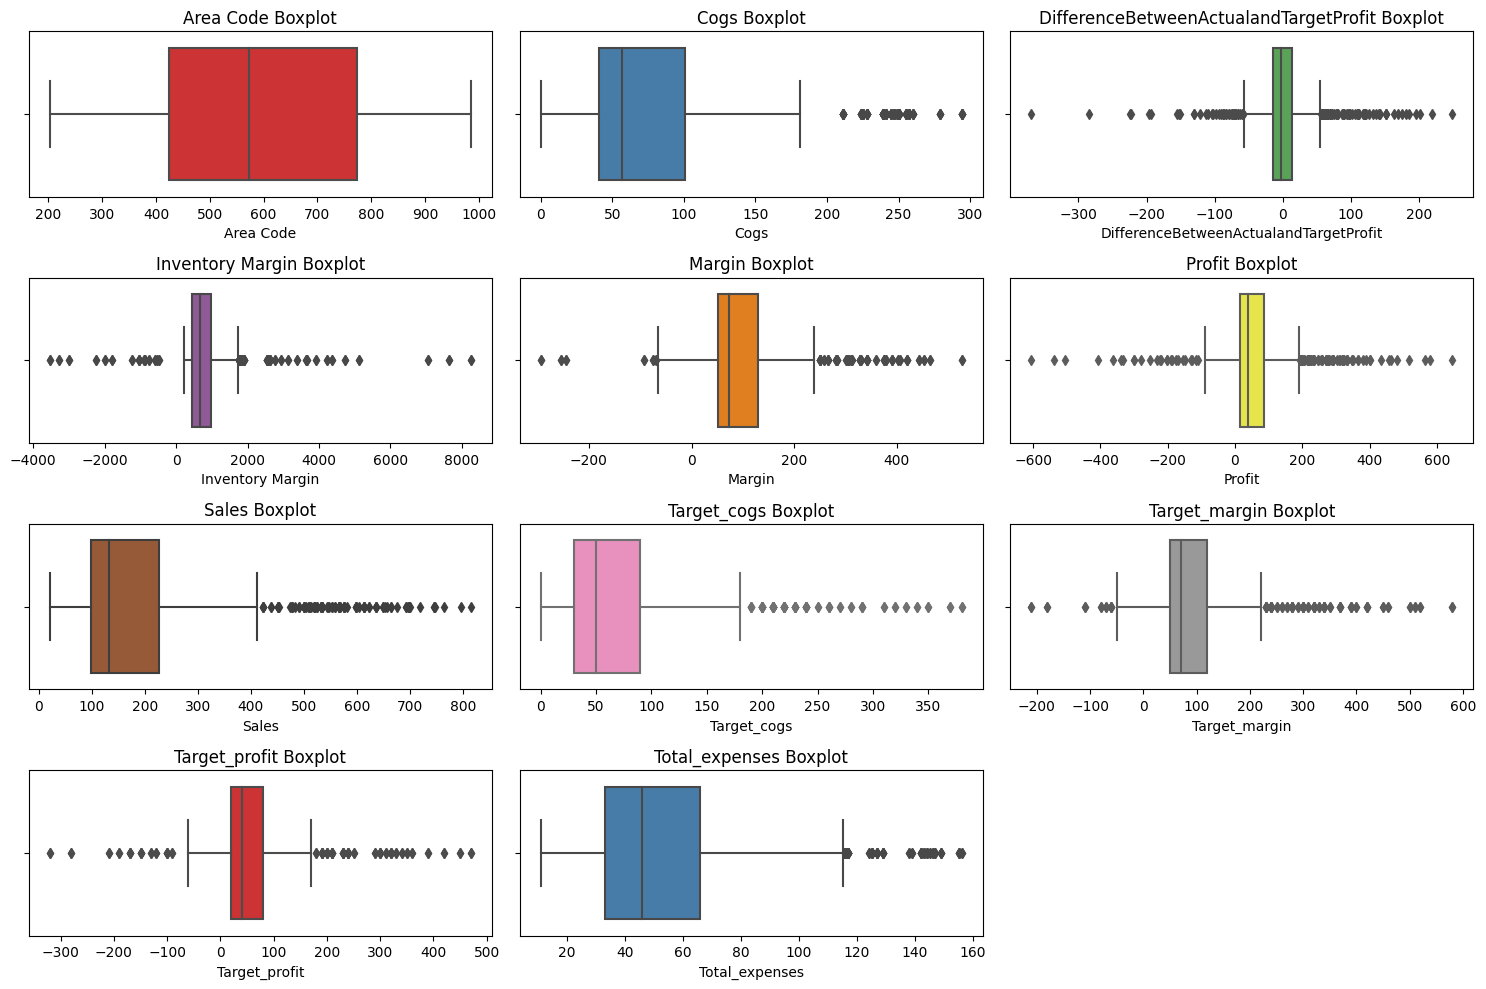

In [8]:
# Boxplot Visualization
col_box = ['Area Code', 'Cogs', 'DifferenceBetweenActualandTargetProfit',
          'Inventory Margin', 'Margin', 'Profit', 'Sales', 'Target_cogs',
          'Target_margin', 'Target_profit', 'Total_expenses']
color_palette = sns.color_palette("Set1", len(col_box))
plt.figure(figsize = (15, 10))

for i, column in enumerate(col_box, 1):
    plt.subplot((len(col_box)//3)+1, 3, i)
    sns.boxplot(data=df, x=column, color=color_palette[i - 1])    
    plt.xlabel(column)
    plt.title(f'{column} Boxplot')

plt.tight_layout()
plt.show()

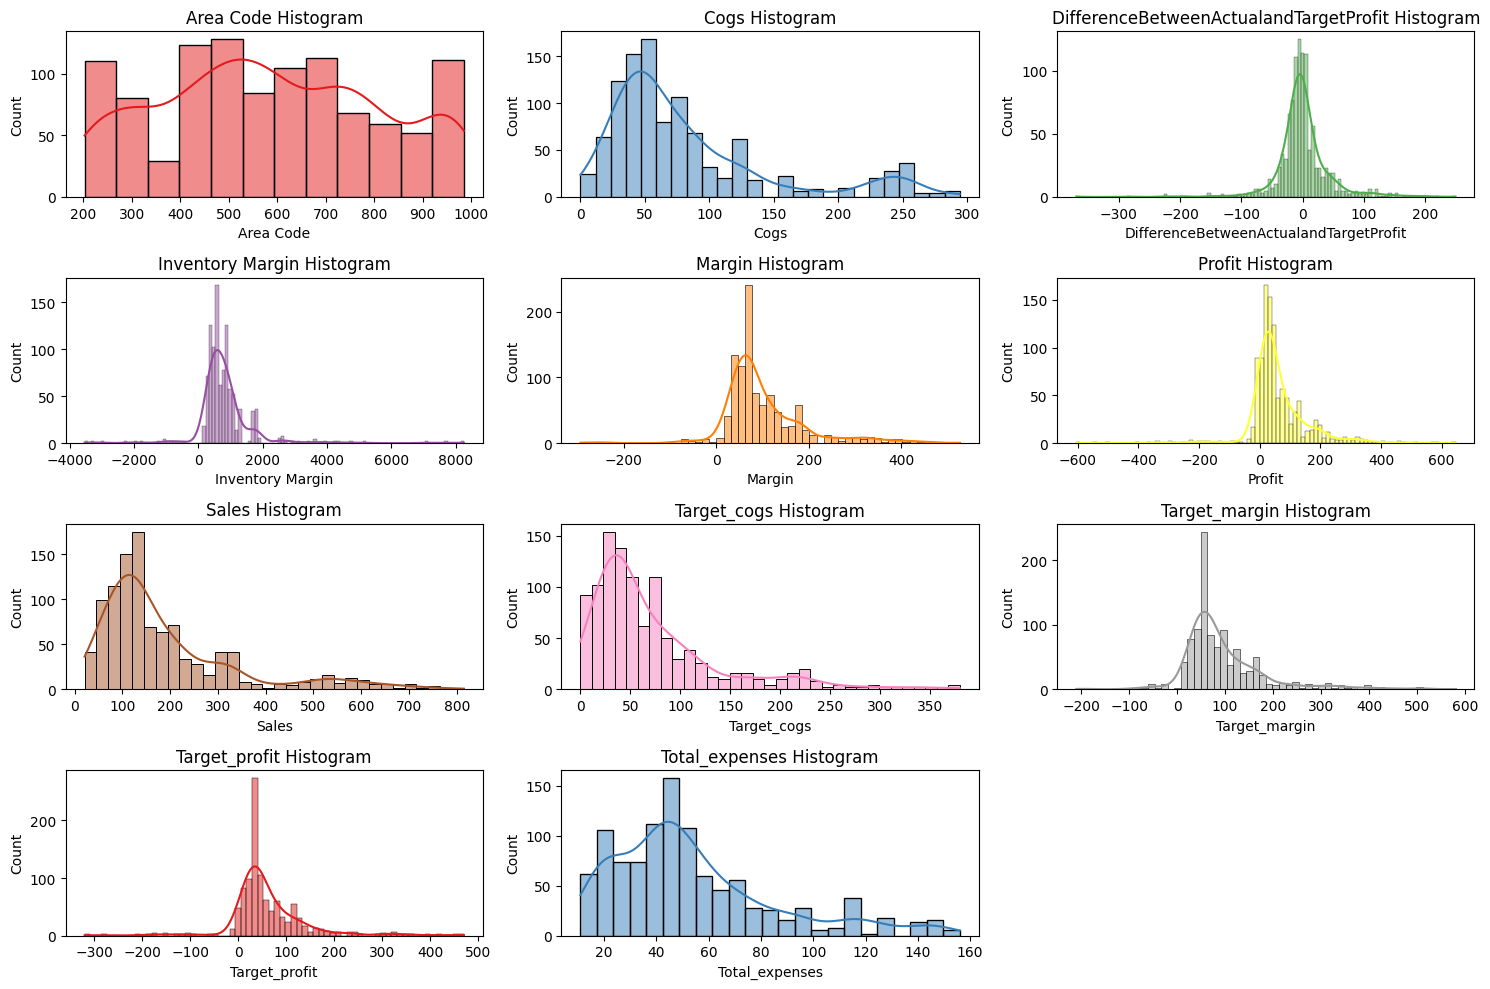

In [9]:
col_box = ['Area Code', 'Cogs', 'DifferenceBetweenActualandTargetProfit',
          'Inventory Margin', 'Margin', 'Profit', 'Sales', 'Target_cogs',
          'Target_margin', 'Target_profit', 'Total_expenses']
color_palette = sns.color_palette("Set1", len(col_box))
plt.figure(figsize=(15, 10))

for i, column in enumerate(col_box, 1):
    plt.subplot((len(col_box) // 3) + 1, 3, i)
    sns.histplot(data=df, x=column, color=color_palette[i - 1], kde=True)
    plt.xlabel(column)
    plt.title(f'{column} Histogram')

plt.tight_layout()
plt.show()

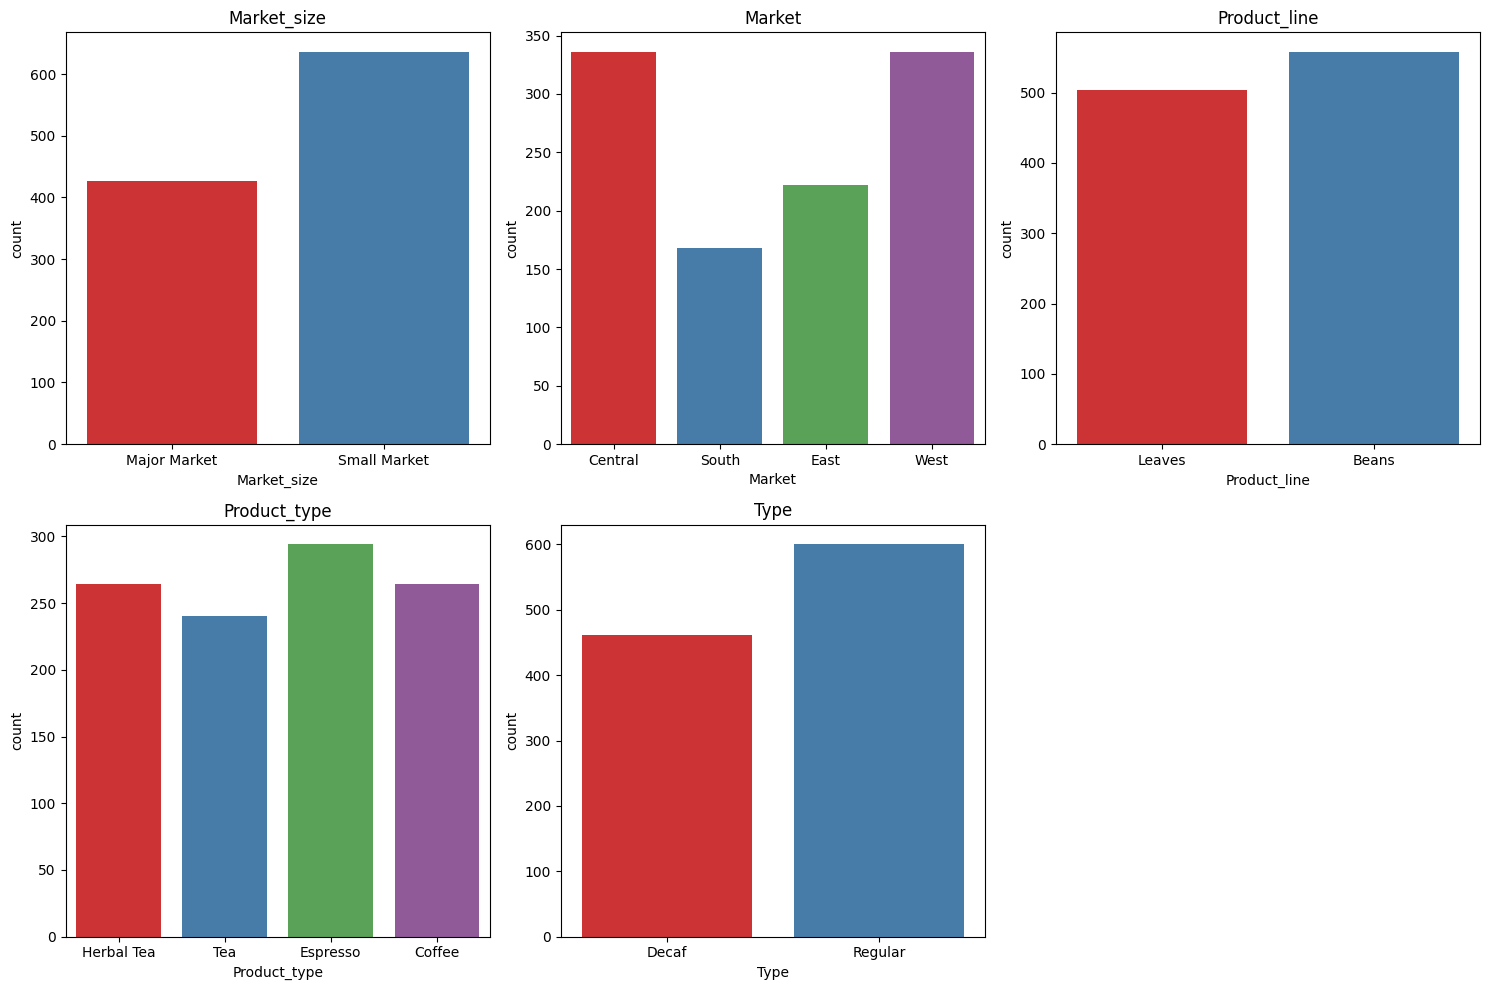

In [10]:
# Barplot Visualization
col_bar = ['Market_size', 'Market', 
           'Product_line', 'Product_type', 'Type']

color_palette = sns.color_palette("Set1", len(col_bar))

plt.figure(figsize=(15, 10)) 
for i, column in enumerate(col_bar, 1):
    plt.subplot((len(col_bar)//3)+1, 3, i)
    sns.countplot(data=df, x=column, palette=color_palette)
    plt.title(column)

plt.tight_layout()
plt.show()

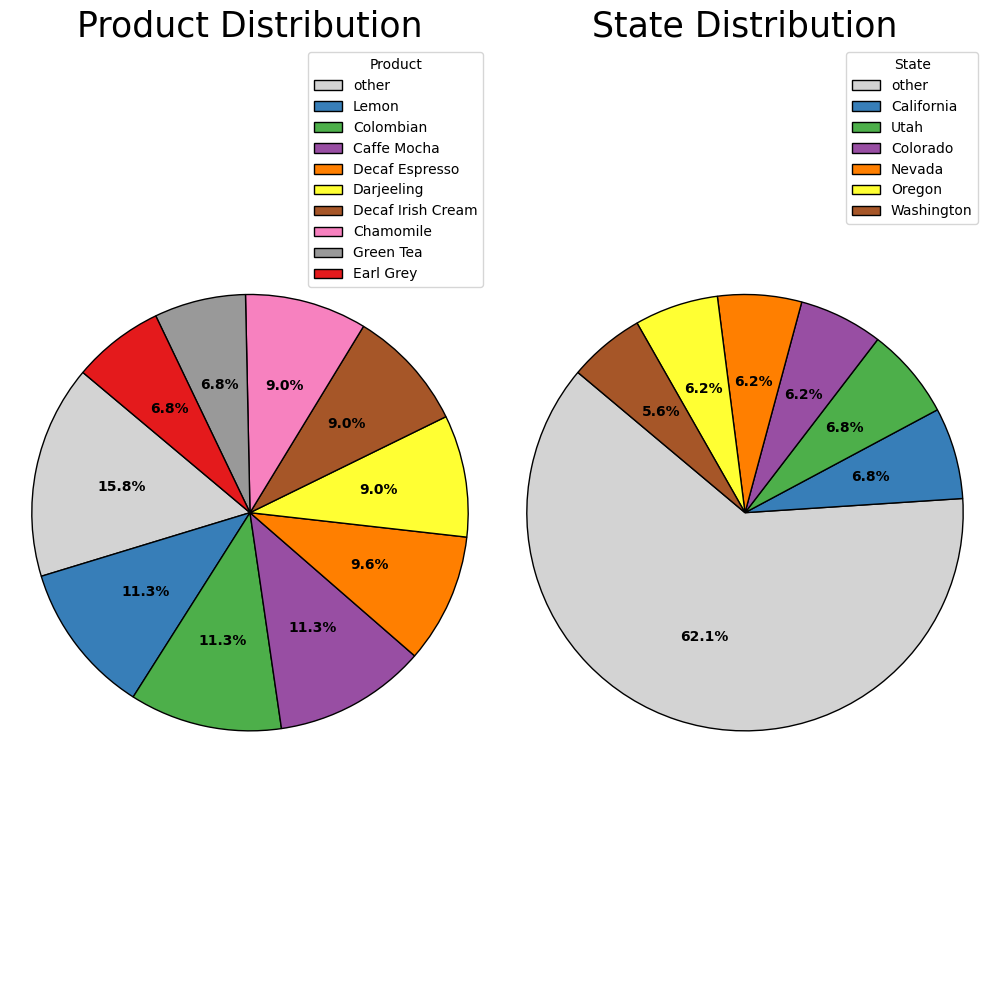

In [11]:
# Pie Chart visualization
col_pie = ['Product', 'State']
df_pie = df[col_pie]

percentage_threshold = 5.5
total_rows = len(df_pie)
for col in col_pie:
    value_counts = df_pie[col].value_counts()
    df_pie[col] = df_pie[col].apply(lambda x: 'other' if (value_counts[x] / total_rows) * 100 < percentage_threshold else x)

color_palette = sns.color_palette("Set1", 20)

plt.figure(figsize=(15, 10)) 
for i in range(len(col_pie)):
    plt.subplot(1, 3, i+1)
    var = df_pie[col_pie[i]].value_counts()
    
    colors = color_palette[:len(var)]
    if 'other' in var:
        other_index = var.index.get_loc('other')
        colors[other_index] = 'lightgray'
    
    wedges, texts, autotexts = plt.pie(var, labels=None, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'linewidth': 1, 'edgecolor': 'black'})
    
    for text, autotext in zip(texts, autotexts):
        text.set(size=10, weight='bold')
        autotext.set(size=10, weight='bold')

    plt.axis('equal')
    plt.title(f'{col_pie[i]} Distribution', fontsize=25)    
    plt.legend(wedges, var.index, title=f'{col_pie[i]}', loc='best')

plt.tight_layout()
plt.show()

# Selection Feature & PCA

<Axes: >

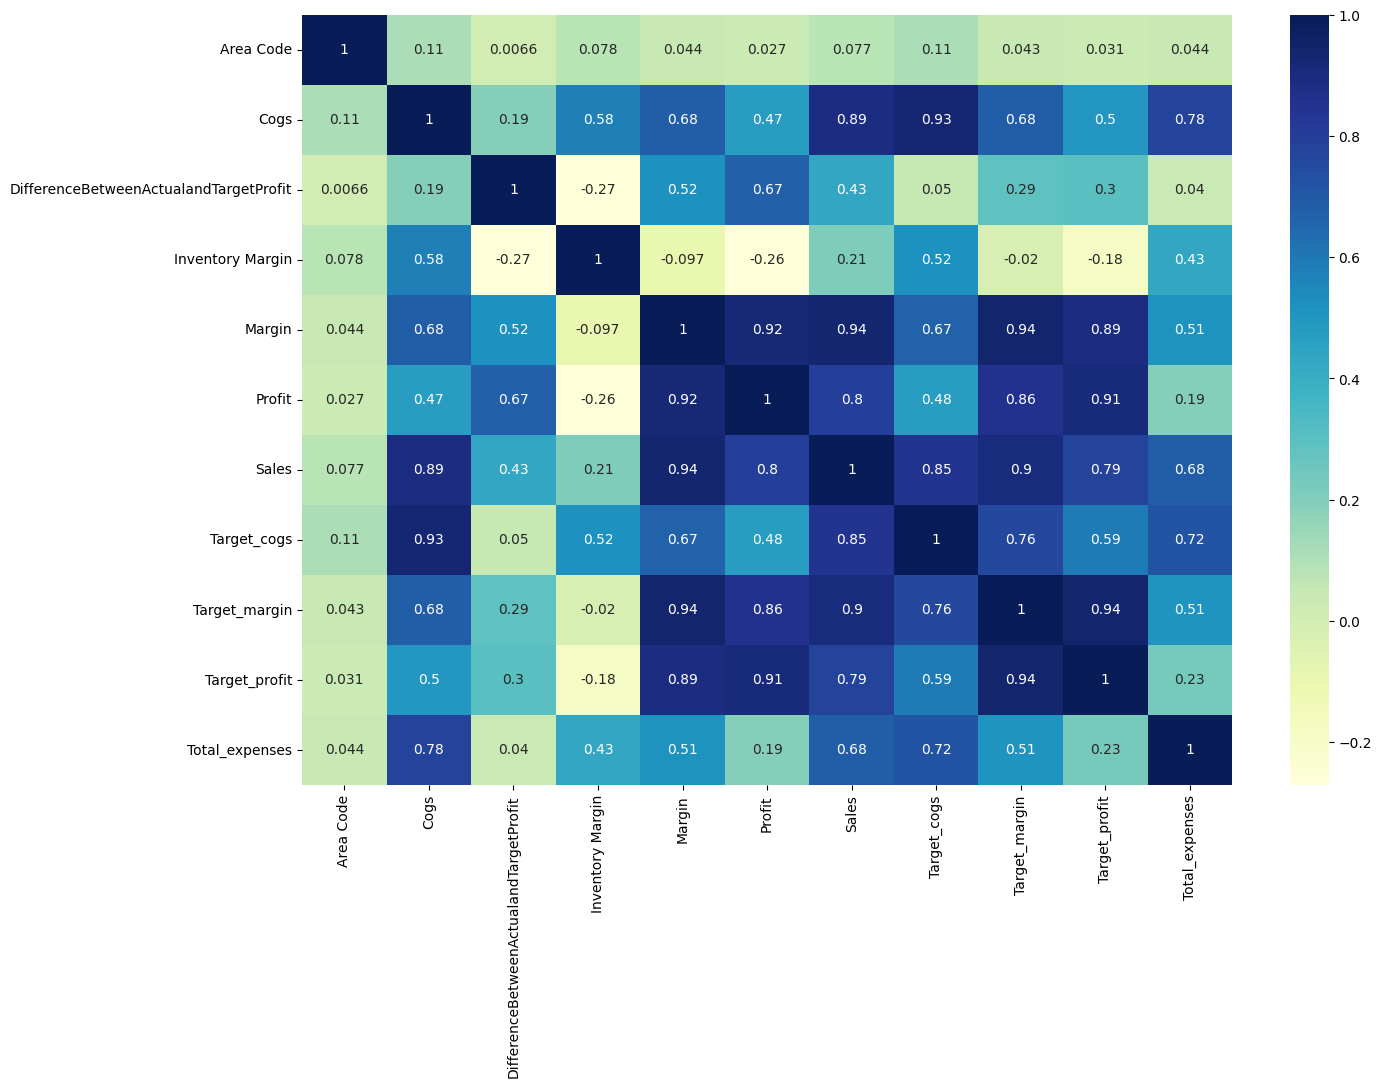

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(df[col_box].corr(), cmap="YlGnBu", annot=True)

In [13]:
scaler = StandardScaler()

df_pca = df[col_box].drop(columns = ['Area Code', 'DifferenceBetweenActualandTargetProfit', 'Inventory Margin'])
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_pca)
pca_data = scaler.fit_transform(pca_data)
pca_data = pd.DataFrame(pca_data, columns=["pc1", "pc2"])  # Menggunakan "pc1" dan "pc2" karena kita hanya memiliki 2 komponen
print("PCA explained variance ratio:\n", " ".join(map("{:.3f}".format, pca.explained_variance_ratio_)))

PCA explained variance ratio:
 0.857 0.103


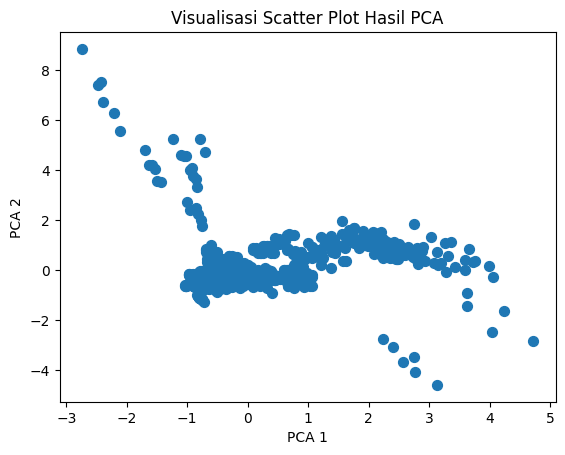

In [14]:
plt.scatter(pca_data["pc1"], pca_data["pc2"], s = 50)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualisasi Scatter Plot Hasil PCA')
plt.show()

# K Means Clustering

In [15]:
pca_data = pca_data.values

In [16]:
wcss = []
scores = []
for i in range(2, 10):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    km.fit(pca_data)
    wcss.append(km.inertia_)

    labels = km.labels_
    silhouette_avg = silhouette_score(pca_data, labels)
    scores.append(silhouette_avg)
    print('wcss score for n_cluster = ' + str(i) + ' is ' + str(wcss))
    print('silhoutte score for n_clusters = ' + str(i) + ' is ' + str(silhouette_avg))

wcss score for n_cluster = 2 is [1324.9284751912332]
silhoutte score for n_clusters = 2 is 0.6415240293967228
wcss score for n_cluster = 3 is [1324.9284751912332, 711.4759116609031]
silhoutte score for n_clusters = 3 is 0.678729385279768
wcss score for n_cluster = 4 is [1324.9284751912332, 711.4759116609031, 528.9644597963357]
silhoutte score for n_clusters = 4 is 0.4742147861739214
wcss score for n_cluster = 5 is [1324.9284751912332, 711.4759116609031, 528.9644597963357, 387.82957733671094]
silhoutte score for n_clusters = 5 is 0.47252290266558633
wcss score for n_cluster = 6 is [1324.9284751912332, 711.4759116609031, 528.9644597963357, 387.82957733671094, 317.29413013014675]
silhoutte score for n_clusters = 6 is 0.4661739836893672
wcss score for n_cluster = 7 is [1324.9284751912332, 711.4759116609031, 528.9644597963357, 387.82957733671094, 317.29413013014675, 258.01014353832596]
silhoutte score for n_clusters = 7 is 0.4282573562696397
wcss score for n_cluster = 8 is [1324.92847519123

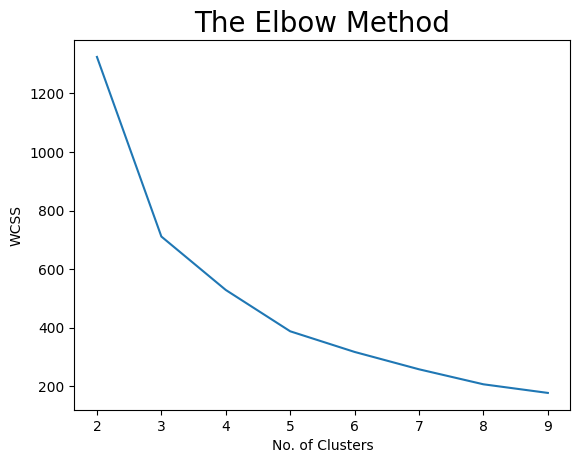

In [17]:
# Visualizing Elbow Method
plt.plot(range(2, 10), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

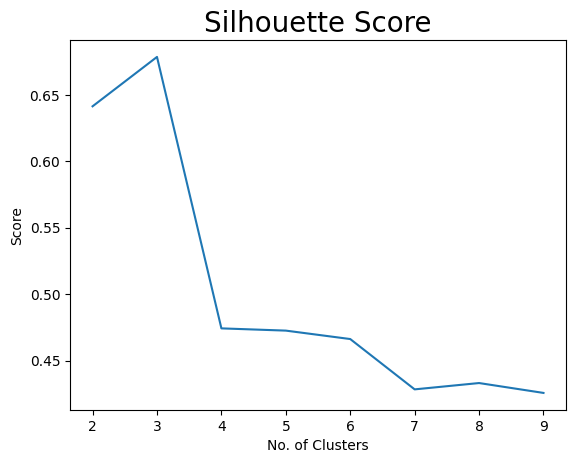

In [18]:
# Visualizing Silhouette Score
plt.plot(range(2, 10), scores)
plt.title('Silhouette Score', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Score')
plt.show()

In [19]:
# Model Build
# Based on the consideration of Elbow Method and Silhouette Score
# I will use many clusters of 3
kmeansmodel = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
y_kmeans= kmeansmodel.fit_predict(pca_data)

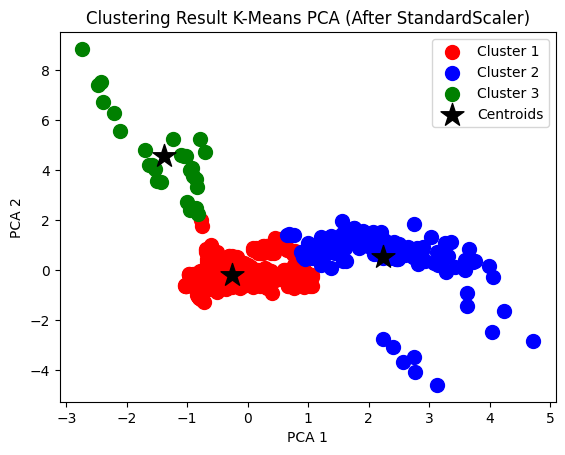

In [20]:
# Cluster visualization using scatter plot
plt.scatter(pca_data[y_kmeans == 0, 0], pca_data[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(pca_data[y_kmeans == 1, 0], pca_data[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(pca_data[y_kmeans == 2, 0], pca_data[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

# Display the cluster center
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids', marker = '*')
plt.title('Clustering Result K-Means PCA (After StandardScaler)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

# Hierarchical Clustering (Agglomerative Clustering)

In [21]:
linkage_col = ['ward', 'complete', 'average', 'single']
scores_all = [[] for _ in range(len(linkage_col))]
for j in range (len(linkage_col)):
    print('Linkage: ', linkage_col[j])
    scores = []
    for i in range(2, 10):
        AC = AgglomerativeClustering(n_clusters=i, linkage = linkage_col[j]) # Menggunakan Ward Method
        AC.fit(pca_data)
        
        labels = AC.labels_
        silhouette_avg = silhouette_score(pca_data, labels)
        scores.append(silhouette_avg)
        print('silhoutte score for n_clusters = ' + str(i) + ' is ' + str(silhouette_avg))
    print("\n##########################\n")
    scores_all[j] = scores

Linkage:  ward
silhoutte score for n_clusters = 2 is 0.6492523224811848
silhoutte score for n_clusters = 3 is 0.6910443821926108
silhoutte score for n_clusters = 4 is 0.4225857290273102
silhoutte score for n_clusters = 5 is 0.43190700960944123
silhoutte score for n_clusters = 6 is 0.4280180934812869
silhoutte score for n_clusters = 7 is 0.42984813129280947
silhoutte score for n_clusters = 8 is 0.4125409020977558
silhoutte score for n_clusters = 9 is 0.42239796879639807

##########################

Linkage:  complete
silhoutte score for n_clusters = 2 is 0.7658582560278364
silhoutte score for n_clusters = 3 is 0.7223811019976311
silhoutte score for n_clusters = 4 is 0.6263163433841711
silhoutte score for n_clusters = 5 is 0.6256678371890732
silhoutte score for n_clusters = 6 is 0.5847727219360757
silhoutte score for n_clusters = 7 is 0.5886629024404545
silhoutte score for n_clusters = 8 is 0.5895685240448512
silhoutte score for n_clusters = 9 is 0.5299317873229217

#####################

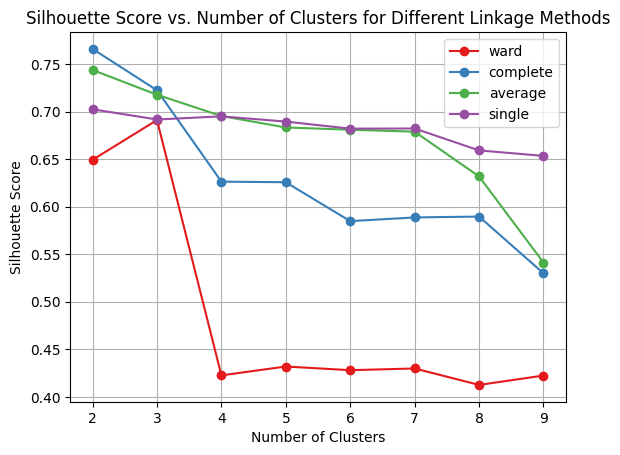

In [22]:
colors = sns.color_palette("Set1", len(linkage_col))

for j in range(len(linkage_col)):
    plt.plot(range(2, 10), scores_all[j], marker='o', color=colors[j], label=linkage_col[j])

plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters for Different Linkage Methods')
plt.legend()
plt.grid(True)
plt.show()

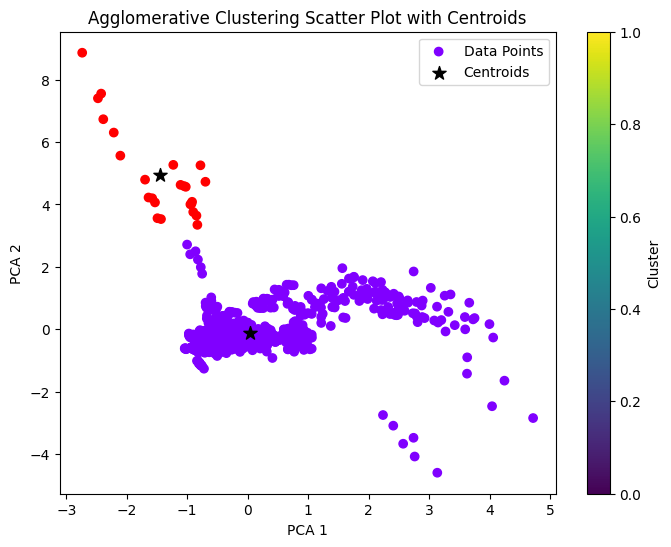

In [23]:
# because the only consideration for taking many clusters is just silhouette score.
# I will create 2 clusters with 'complete' linkage
n_cluster = 2
AC = AgglomerativeClustering(n_clusters=n_cluster, linkage='complete')
labels = AC.fit_predict(pca_data)

df_train_with_labels = np.column_stack((pca_data, labels))

centroids = []
for cluster_label in range(n_cluster):  
    cluster_data = df_train_with_labels[df_train_with_labels[:, -1] == cluster_label]
    cluster_centroid = np.mean(cluster_data[:, :-1], axis=0)
    centroids.append(cluster_centroid)

centroids = np.array(centroids)

plt.figure(figsize=(8, 6))

x = pca_data[:, 0]
y = pca_data[:, 1]

plt.scatter(x, y, c=labels, cmap='rainbow', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='*', s=100, label='Centroids')

plt.title('Agglomerative Clustering Scatter Plot with Centroids')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

In [24]:
linked = sch.linkage(pca_data, 'complete')

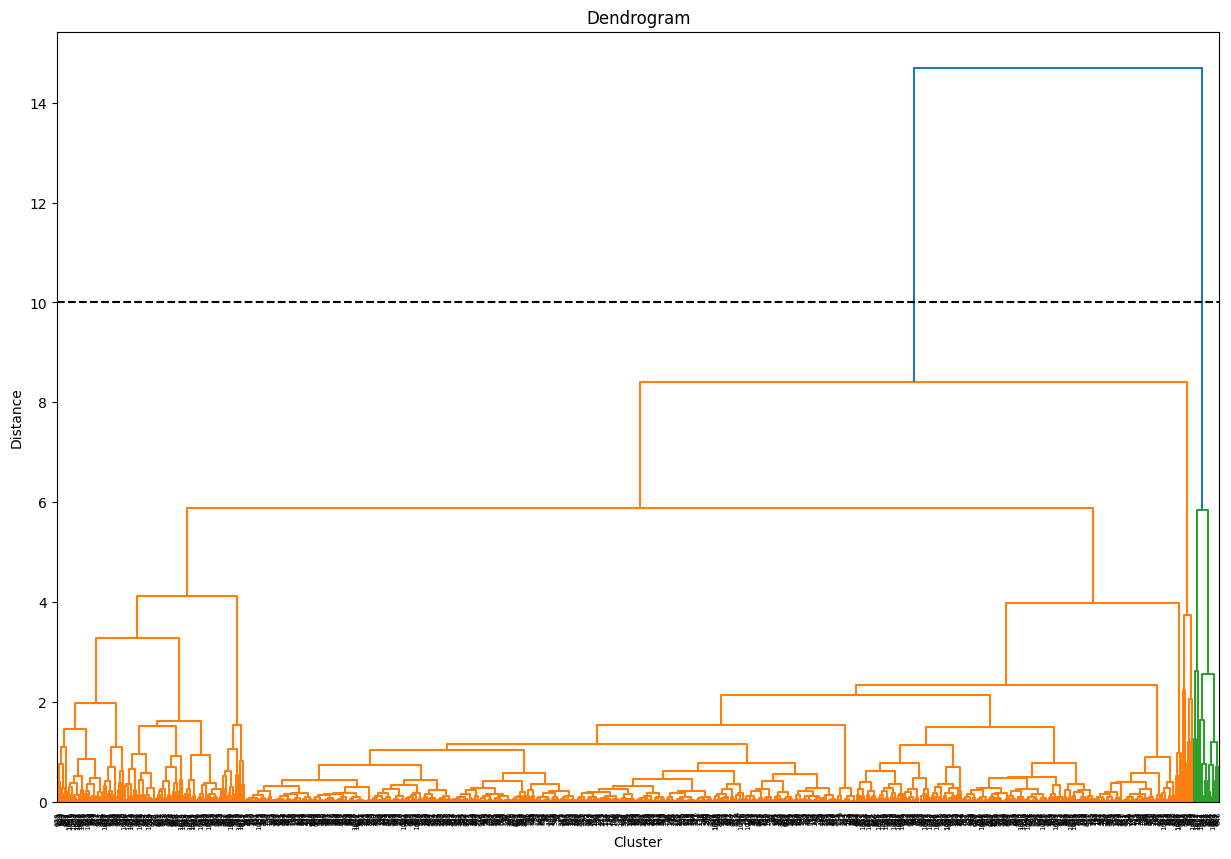

In [25]:
plt.figure(figsize=(15, 10))
dendrogram = sch.dendrogram(linked, orientation='top',distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Cluster')
plt.ylabel('Distance')
plt.axhline(y=10, color='black', linestyle='--') # at this point, will divide the data into 2 clusters
plt.show()

# DB Scan

In [26]:
epsilon = [1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4]
min_samples = [10, 15, 20, 25]

sil_avg = []
max_value = (0, 0, 0, -1)  # Initialize max_value with a negative silhouette score

for i in range(len(epsilon)):
    for j in range(len(min_samples)):
        db = DBSCAN(min_samples=min_samples[j], eps=epsilon[i]).fit(pca_data)

        # Check if there are at least two clusters
        unique_labels = set(db.labels_)
        if len(unique_labels) >= 2:
            core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
            core_samples_mask[db.core_sample_indices_] = True
            labels = db.labels_

            # Number of clusters in labels, ignoring noise if present.
            n_clusters_ = len(unique_labels) - (1 if -1 in labels else 0)
            n_noise_ = list(labels).count(-1)

            silhouette_avg = silhouette_score(pca_data, labels)
            sil_avg.append(silhouette_avg)

            if silhouette_avg > max_value[3]:
                max_value = (epsilon[i], min_samples[j], n_clusters_, silhouette_avg)

print("epsilon =", max_value[0],
      "\nmin_samples =", max_value[1],
      "\nnumber of clusters =", max_value[2],
      "\naverage silhouette score = %.4f" % max_value[3])

epsilon = 2.5 
min_samples = 15 
number of clusters = 1 
average silhouette score = 0.8377


In [27]:
db=DBSCAN(eps=2.5, min_samples=15, metric='euclidean')
db.fit(pca_data)

DBSCAN(eps=2.5, min_samples=15)

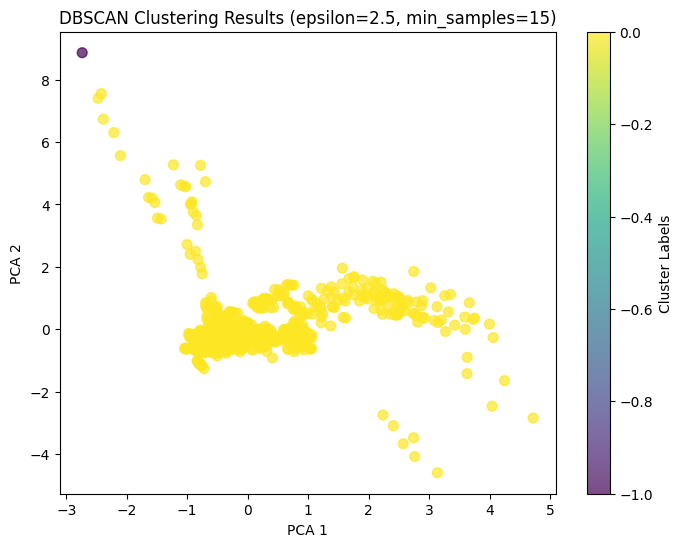

In [28]:
best_epsilon = max_value[0]
best_min_samples = max_value[1]
best_labels = db.labels_ 

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=best_labels, cmap='viridis', s=50, alpha=0.7)

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('DBSCAN Clustering Results (epsilon={}, min_samples={})'.format(best_epsilon, best_min_samples))

plt.colorbar(label='Cluster Labels')
plt.show()